The variables worth discretizing are "Dev_Proxima", "Dev_uni_Proxima", "Demanda_uni_equil", "Venta_hoy" and "Venta_uni_hoy", the rest of the variables are categorical so it doesn't make a lot of sense. Next we're gonna discretize the data by both frequency and width for each dimension. To accomplish this we're gonna use python and some useful libraries like Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv("sample.csv")
#dataset.hist(bins=200,figsize =(10,10))
plt.show()
categorical = ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']   
    

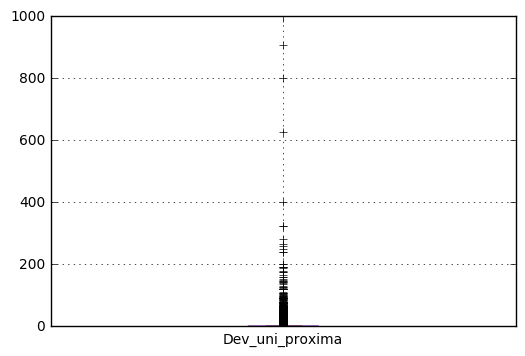

In [2]:
dataset.boxplot('Dev_uni_proxima', return_type='axes')
plt.show()

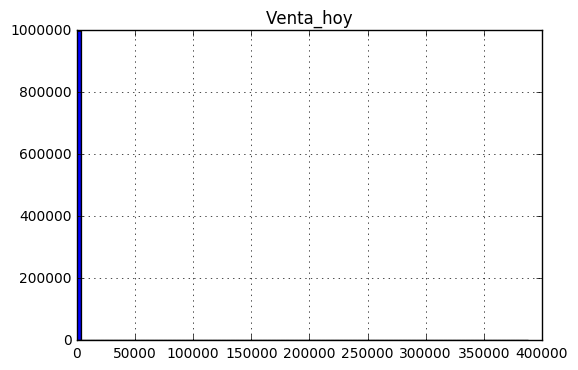

In [8]:
dataset.hist('Venta_hoy',bins = 100)
plt.show()

##### Frequency
For this, we're gonna use the function "qcut". This functions divides the data in q intervals with the exact same frequency

In [3]:
def group(data, dimension, quantil, categorical, labels = None):
    # Make q categories with the same frequency, q quantiles
    frq_binned = pd.qcut(data[dimension], q = quantil, labels = labels)

    # We show a group of the data using the new categories and the mean of each dimension
    # For the categorical data, we use the mode instead
    bin_data = dataset.groupby(frq_binned)
    new_data = bin_data.mean()
    
    for dim in categorical:
        new_data[dim] = bin_data[dim].agg(lambda x:x.value_counts().index[0])  
   
    return (new_data, frq_binned)

##### Venta_hoy

In [4]:
# Make q categories with the same frequency, q quantiles
group(dataset, 'Venta_hoy', 64, categorical)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_hoy,,,,,,,,,,,
"[0, 6.25]",9,1945,1,2803,653378,43274,0.843622,4.092930,1.202972,10.720104,0.821475
"(6.25, 7.59]",8,1631,1,2802,344070,1309,1.039391,7.144759,0.080408,0.569615,0.996157
"(7.59, 8.15]",3,1227,1,2802,1286525,1220,1.011575,7.889306,0.047879,0.363531,0.979926
"(8.15, 8.38]",9,1237,1,1208,4665536,1212,1.001689,8.378852,0.070615,0.591038,0.950400
"(8.38, 9]",6,1219,1,1603,278951,1278,1.367199,8.902729,0.102311,0.727015,1.300977
"(9, 9.83]",3,1227,1,1221,584841,1238,1.352189,9.489501,0.064204,0.498601,1.313610
"(9.83, 10.38]",4,1911,1,2803,381841,41938,1.233182,10.062133,0.044986,0.417491,1.206603
"(10.38, 11.53]",9,1220,1,2102,905794,3270,1.435987,10.805875,0.057599,0.527882,1.393272
"(11.53, 12.59]",5,1945,1,2802,499440,31507,2.120546,12.301983,0.088405,0.629754,2.076275


##### Venta_uni_hoy

In [5]:
# Make q categories with the same frequency, q quantiles
group(dataset, 'Venta_uni_hoy', 7, categorical)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_uni_hoy,,,,,,,,,,,
"[0, 1]",3,1123,1,1202,653378,1109,0.977657,12.402014,0.174306,1.807977,0.932259
"(1, 2]",3,1911,1,1201,653378,1242,2.000000,21.519952,0.062984,0.668411,1.954030
"(2, 3]",3,1911,1,1202,1976946,1240,3.000000,30.063730,0.062904,0.638057,2.952217
"(3, 4]",3,1911,1,1201,653378,1242,4.000000,38.605183,0.060768,0.582770,3.950820
"(4, 6]",3,1911,1,1201,653378,1284,5.425943,48.447709,0.080820,0.717679,5.367721
"(6, 10]",4,1911,1,1101,653378,1284,8.637771,73.435134,0.090905,0.780827,8.563808
"(10, 4999]",4,1911,1,6601,653378,2425,30.505481,287.521542,0.321009,3.258130,30.224306


##### Dev_uni_proxima

In [6]:
# Make q categories with the same frequency, q quantiles
group(dataset, 'Dev_uni_proxima', 1, categorical)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Dev_uni_proxima,,,,,,,,,,,
"[0, 909]",3,1911,1,1201,653378,1240,7.290241,68.915403,0.124786,1.246774,7.206405


##### Dev_proxima

In [7]:
# Make q categories with the same frequency, q quantiles
group(dataset, 'Dev_proxima', 1, categorical)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Dev_proxima,,,,,,,,,,,
"[0, 21616.02]",3,1911,1,1201,653378,1240,7.290241,68.915403,0.124786,1.246774,7.206405


##### Demanda_uni_equil

In [8]:
# Make q categories with the same frequency, q quantiles
group(dataset, 'Demanda_uni_equil', 7, categorical)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Demanda_uni_equil,,,,,,,,,,,
"[0, 1]",3,1123,1,1202,653378,1109,1.109565,13.436808,0.409899,3.906447,0.908123
"(1, 2]",3,1911,1,1201,433696,1242,2.023520,21.717738,0.023520,0.232359,2.000000
"(2, 3]",3,1911,1,1204,1976946,1240,3.026251,30.307144,0.026251,0.262298,3.000000
"(3, 4]",3,1911,1,1201,30994,1242,4.025605,38.826352,0.025605,0.253865,4.000000
"(4, 6]",3,1911,1,1201,653378,1284,5.452693,48.711461,0.026172,0.259755,5.426522
"(6, 10]",4,1911,1,1101,653378,1284,8.671558,73.748065,0.037643,0.360736,8.633915
"(10, 4999]",4,1911,1,6601,653378,2425,30.609127,288.615648,0.189814,2.185168,30.419313


##### Width
Now, the idea is to find interval with the same width in the data, this is quite simple to do with Pandas giving the amount of bins one wish for. To find a good number of bins, it is possible to let "Numpy" decide it.

In [9]:
def w_group(data, dimension, categorical, bins = 'sqrt', labels = None):
    j_ = np.histogram(data[dimension], bins = bins)
    bins = j_[0].shape[0]
    print bins
    frq_binned = pd.cut(data[dimension], bins = bins, right = False, labels = labels)

    # We show a group of the data using the new categories and the mean of each dimension
    # For the categorical data, we use the mode instead
    bin_data = dataset.groupby(frq_binned)
    new_data = bin_data.mean()
    
    for dim in categorical:
        #new_data[dim] = bin_data[dim].agg(lambda x: x.value_counts().index[0] if True else 0)  
        new_data[dim] = bin_data[dim].agg(lambda x:x.value_counts().index[0] if x.value_counts().size != 0 else float('nan'))  
    return (new_data, frq_binned)

##### Venta_hoy

In [93]:
w_group(dataset, 'Venta_hoy', categorical, 'doane')[0]

39


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_hoy,,,,,,,,,,,
"[0, 9959.385)",3.0,1911.0,1.0,1201.0,653378.0,1240.0,7.187702,66.492039,0.124229,1.234674,7.104429
"[9959.385, 19918.769)",3.0,1114.0,2.0,1501.0,20983.0,34786.0,651.377953,13303.770315,4.503937,96.261890,646.874016
"[19918.769, 29878.154)",8.0,1934.0,2.0,1501.0,2384654.0,34787.0,1147.375000,22913.346250,0.250000,4.100000,1147.125000
"[29878.154, 39837.538)",6.0,2655.0,4.0,3901.0,8356583.0,32799.0,2367.000000,31966.162500,0.000000,0.000000,2367.000000
"[39837.538, 49796.923)",8.0,1129.0,2.0,81.0,812391.0,31473.0,1440.000000,40248.000000,0.000000,0.000000,1440.000000
"[49796.923, 59756.308)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[59756.308, 69715.692)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[69715.692, 79675.0769)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[79675.0769, 89634.462)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Venta_uni_hoy

In [11]:
w_group(dataset, 'Venta_uni_hoy', categorical, 'doane')[0]

36


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_uni_hoy,,,,,,,,,,,
"[0, 138.861)",3.0,1911.0,1.0,1201.0,653378.0,1240.0,6.522413,58.187693,0.114687,1.129994,6.448785
"[138.861, 277.722)",4.0,1129.0,2.0,3001.0,653378.0,34786.0,188.968985,2578.177274,2.941259,32.686227,186.032895
"[277.722, 416.583)",7.0,1142.0,2.0,3007.0,653378.0,34865.0,334.196035,4613.105991,4.359031,50.530551,329.837004
"[416.583, 555.444)",4.0,1129.0,2.0,3002.0,653378.0,34786.0,475.129944,7179.675706,5.864407,59.316215,469.265537
"[555.444, 694.306)",7.0,1114.0,2.0,1501.0,653378.0,49028.0,616.175000,12612.360000,9.587500,134.277625,606.587500
"[694.306, 833.167)",5.0,1129.0,2.0,3905.0,653378.0,5200.0,771.269231,9595.353077,13.461538,227.493462,757.807692
"[833.167, 972.0278)",7.0,1694.0,2.0,2527.0,653378.0,30314.0,889.473684,10663.086842,1.263158,11.946842,888.210526
"[972.0278, 1110.889)",3.0,2655.0,2.0,3918.0,1031135.0,49028.0,1024.500000,13445.430000,0.000000,0.000000,1024.500000
"[1110.889, 1249.75)",6.0,2655.0,4.0,6655.0,1216931.0,5919.0,1196.285714,15602.454286,0.000000,0.000000,1196.285714


##### Dev_uni_proxima

In [12]:
w_group(dataset, 'Dev_uni_proxima', categorical, 'doane')[0]

37


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Dev_uni_proxima,,,,,,,,,,,
"[0, 24.568)",3.0,1911.0,1.0,1201.0,653378.0,1240.0,7.248482,68.470067,0.090777,0.942466,7.180922
"[24.568, 49.135)",7.0,1114.0,1.0,3001.0,653378.0,36610.0,67.139651,676.481247,34.152120,282.517382,46.034913
"[49.135, 73.703)",5.0,1114.0,1.0,3002.0,653378.0,30575.0,85.202128,953.155106,57.361702,500.128404,53.659574
"[73.703, 98.27)",9.0,1311.0,1.0,3001.0,653378.0,36610.0,98.563636,1085.484727,83.836364,723.620000,60.963636
"[98.27, 122.838)",6.0,1279.0,1.0,1501.0,52863.0,36610.0,27.400000,178.251333,112.200000,782.564667,6.600000
"[122.838, 147.405)",9.0,1464.0,5.0,3006.0,653378.0,31310.0,235.333333,2083.364444,137.444444,1341.386667,117.888889
"[147.405, 171.973)",8.0,1691.0,1.0,54.0,142149.0,45143.0,184.000000,2984.168000,157.400000,1170.348000,102.000000
"[171.973, 196.541)",7.0,2034.0,5.0,3917.0,653124.0,30572.0,135.000000,1210.342857,184.857143,1757.422857,70.000000
"[196.541, 221.108)",7.0,1337.0,1.0,2034.0,4402611.0,33794.0,0.000000,0.000000,200.000000,127.000000,0.000000


##### Dev_proxima

In [13]:
w_group(dataset, 'Dev_proxima', categorical, 'doane')[0]

39


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Dev_proxima,,,,,,,,,,,
"[0, 554.257)",3.0,1911.0,1.0,1201.0,653378.0,1240.0,7.273361,68.645752,0.110207,1.041100,7.195787
"[554.257, 1108.514)",9.0,1114.0,2.0,3001.0,653378.0,34210.0,100.160714,1476.591786,60.803571,742.595536,66.982143
"[1108.514, 1662.771)",9.0,1114.0,2.0,13.0,653378.0,34865.0,152.782609,2379.229130,91.130435,1318.132609,104.869565
"[1662.771, 2217.0277)",3.0,4063.0,2.0,1519.0,297710.0,30575.0,136.250000,2604.856250,146.125000,1848.338750,74.125000
"[2217.0277, 2771.285)",7.0,1279.0,2.0,15.0,22534.0,49028.0,170.200000,2265.482000,195.400000,2533.520000,69.000000
"[2771.285, 3325.542)",8.0,1114.0,2.0,54.0,19162.0,34786.0,583.000000,12680.250000,148.000000,3219.000000,435.000000
"[3325.542, 3879.798)",7.0,1139.0,1.0,1219.0,4431556.0,1182.0,17.500000,331.100000,227.500000,3726.205000,0.000000
"[3879.798, 4434.0554)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[4434.0554, 4988.312)",7.0,1139.0,1.0,3402.0,165007.0,8865.0,1.000000,18.860000,168.500000,4591.200000,0.000000


##### Demanda_uni_equil

In [14]:
w_group(dataset, 'Demanda_uni_equil', categorical, 'doane')[0]

36


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Demanda_uni_equil,,,,,,,,,,,
"[0, 138.861)",3.0,1911.0,1.0,1201.0,653378.0,1240.0,6.531550,58.293509,0.117118,1.157187,6.455500
"[138.861, 277.722)",4.0,1129.0,2.0,3001.0,653378.0,34786.0,190.661871,2607.874724,2.062830,23.294197,188.599041
"[277.722, 416.583)",7.0,1142.0,2.0,3001.0,653378.0,49028.0,338.750557,4680.169599,4.919822,52.766570,333.830735
"[416.583, 555.444)",4.0,1114.0,2.0,3002.0,653378.0,34786.0,483.263158,7388.151637,6.941520,100.445906,476.321637
"[555.444, 694.306)",7.0,1142.0,2.0,1501.0,653378.0,49028.0,615.760000,12848.063867,2.240000,29.682400,613.520000
"[694.306, 833.167)",5.0,1129.0,2.0,3905.0,653378.0,48996.0,776.884615,9350.640000,4.500000,38.205769,772.384615
"[833.167, 972.0278)",7.0,4011.0,2.0,2527.0,653378.0,30314.0,892.166667,10822.832778,0.444444,4.379444,891.722222
"[972.0278, 1110.889)",3.0,2655.0,2.0,3918.0,1031135.0,49028.0,1024.500000,13445.430000,0.000000,0.000000,1024.500000
"[1110.889, 1249.75)",6.0,2655.0,4.0,6655.0,1216931.0,5919.0,1196.285714,15602.454286,0.000000,0.000000,1196.285714


#### Another approach

In [48]:
def alt_group(data, dimension, categorical, tress = 20, labels = None):
    _se = pd.Series(data[dimension])
    freq_ = pd.DataFrame(_se.value_counts())
    
    count = 0
    for i in freq_.values:
        if i < tress:
            count = count + 1   
    
    x = freq_.axes[0][:freq_.axes[0].shape[0]-count]
    j = np.histogram(x, bins = 'auto')
    #plt.hist(x, bins = 'auto')
    #plt.show()
    n_j = np.append(j[1],freq_.axes[0].max() + 1)
    
    frq_binned = pd.cut(data[dimension], bins = n_j, labels = labels)
    bin_data = dataset.groupby(frq_binned)
    new_data = bin_data.mean()
    
    for dim in categorical:
        #new_data[dim] = bin_data[dim].agg(lambda x: x.value_counts().index[0] if True else 0)  
        new_data[dim] = bin_data[dim].agg(lambda x:x.value_counts().index[0] if x.value_counts().size != 0 else float('nan'))  
        
    return (new_data, frq_binned)

##### Venta_hoy

In [63]:
alt_group(dataset, 'Venta_hoy', categorical, 20)[0]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_hoy,,,,,,,,,,,
"(0, 18.785]",3,2015,1,1203,653378,1212,1.730731,12.871048,0.064414,0.548126,1.686995
"(18.785, 37.571]",3,1911,1,1201,653378,41938,4.148982,27.080160,0.079949,0.661686,4.087953
"(37.571, 56.356]",4,1911,1,1201,653378,2233,5.571078,45.456585,0.074214,0.729129,5.512764
"(56.356, 75.142]",4,1911,1,1101,653378,2233,8.765163,64.759708,0.086634,0.853404,8.700128
"(75.142, 93.927]",4,1911,1,1102,653378,2233,10.535610,83.903726,0.100699,0.951945,10.464815
"(93.927, 112.713]",4,1911,1,1001,653378,2233,12.080845,103.236799,0.098158,0.996665,11.993494
"(112.713, 131.498]",3,1911,1,1001,653378,2233,13.850807,121.883756,0.097213,1.000835,13.762663
"(131.498, 150.284]",3,1126,1,1001,653378,2233,16.110039,140.572388,0.156793,1.625472,15.982618
"(150.284, 169.0691]",4,1911,1,6601,653378,2233,18.620050,159.268195,0.165567,1.576464,18.480881


##### Venta_uni_hoy

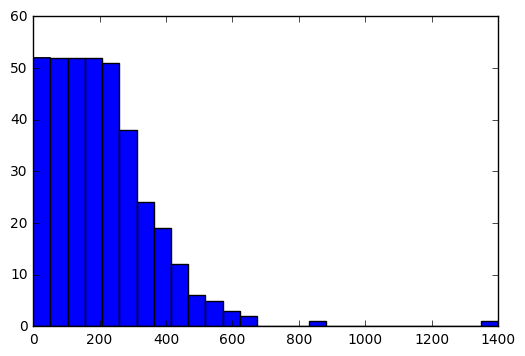

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Venta_uni_hoy,,,,,,,,,,,
"(0, 51.852]",3,1911,1,1201,653378,1240,5.775884,50.526298,0.086615,0.850211,5.709941
"(51.852, 103.704]",7,1142,1,6601,653378,2425,71.392801,681.501900,0.682902,8.204830,70.718785
"(103.704, 155.556]",5,1142,2,3002,653378,2425,125.346483,1568.289059,1.644962,19.991141,123.727662
"(155.556, 207.407]",7,1129,2,3001,653378,34206,177.634731,2333.485679,3.202595,35.139731,174.443114
"(207.407, 259.259]",4,1114,2,3002,653378,34786,231.762452,3233.643448,3.695402,37.428046,228.067050
"(259.259, 311.111]",5,1114,2,3001,653378,34206,282.758503,3945.676429,3.289116,42.392143,279.469388
"(311.111, 362.963]",9,1142,2,3007,653378,34207,337.207317,4464.726280,4.731707,55.719207,332.475610
"(362.963, 414.815]",4,1142,2,3001,653378,49028,389.131579,5731.229561,4.903509,47.235439,384.228070
"(414.815, 466.667]",7,1129,2,3007,653378,34786,437.166667,6638.615119,5.440476,60.000714,431.726190


In [17]:
alt_group(dataset, 'Venta_uni_hoy', categorical, 3)[0]

##### Dev_uni_proxima

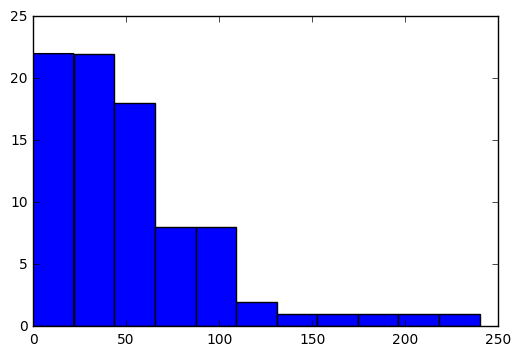

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Dev_uni_proxima,,,,,,,,,,,
"(0, 21.818]",9,1911,1,1201,653378,35651,10.128984,118.270217,2.619654,27.232660,8.174370
"(21.818, 43.636]",6,1114,1,3001,653378,36610,64.704312,654.786181,31.034908,259.729754,44.930185
"(43.636, 65.455]",5,1114,1,3007,653378,30575,90.314815,1018.338241,53.518519,475.679167,61.898148
"(65.455, 87.273]",3,1311,1,3001,653378,36610,129.212766,1478.455319,77.085106,594.535106,84.234043
"(87.273, 109.0909]",5,1983,5,3008,653378,30532,34.346154,363.818462,95.576923,1041.681923,10.923077
"(109.0909, 130.909]",6,1279,1,3006,653378,36610,111.000000,730.325455,121.454545,643.298182,75.272727
"(130.909, 152.727]",8,1114,2,3005,653378,30574,203.875000,2961.435000,144.375000,1709.855000,83.500000
"(152.727, 174.545]",3,1347,1,2051,653378,45143,107.333333,715.613333,162.333333,560.913333,25.000000
"(174.545, 196.364]",7,2034,5,3917,653124,30572,135.000000,1210.342857,184.857143,1757.422857,70.000000


In [18]:
alt_group(dataset, 'Dev_uni_proxima', categorical, 2)[0]

##### Demanda_uni_equil

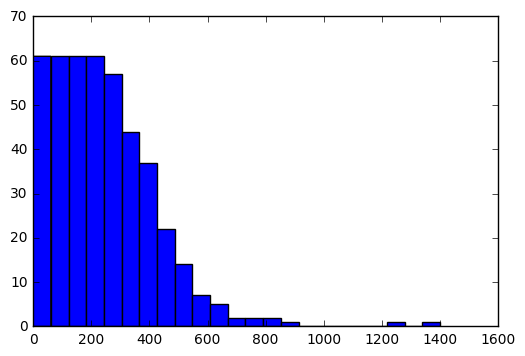

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Demanda_uni_equil,,,,,,,,,,,
"(0, 60.87]",3,1911,1,1201,653378,1240,5.982905,52.540797,0.039772,0.413363,5.943134
"(60.87, 121.739]",7,1142,1,6601,653378,2425,84.278600,826.000879,0.685259,8.669082,83.593341
"(121.739, 182.609]",5,1142,2,3001,653378,2425,150.088849,1943.938742,1.621944,18.509523,148.466905
"(182.609, 243.478]",4,1129,2,3002,653378,34786,212.822819,3017.473208,2.465772,27.414040,210.357047
"(243.478, 304.348]",5,1114,2,3002,653378,34206,273.976127,3846.101751,3.596817,40.876340,270.379310
"(304.348, 365.217]",9,1114,2,3001,653378,34865,337.084577,4421.109353,5.497512,56.563333,331.587065
"(365.217, 426.087]",7,1142,2,3001,653378,49028,399.164179,5931.990373,2.708955,29.365821,396.455224
"(426.087, 486.957]",7,1114,2,3003,653378,34786,467.662651,7644.688313,9.325301,146.300602,458.337349
"(486.957, 547.826]",4,1114,2,1504,653378,34786,516.175439,7375.771754,4.157895,38.014912,512.017544


In [19]:
alt_group(dataset, 'Demanda_uni_equil', categorical, 2)[0]

#### Its also possible to group the data using the categorical dimensions 

#### Semana

In [20]:
grouped = dataset.groupby(dataset['Semana'])
new_data = grouped.mean()
    
for dim in categorical:
    new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Semana
Semana,,,,,,,,,,,
3,1911,1,1201,653378,1240,7.047138,66.735900,0.115953,1.130553,6.973074,3
4,1911,1,1201,653378,1240,7.286340,69.099094,0.116815,1.245421,7.203346,4
5,1911,1,1201,653378,1240,7.352494,67.842282,0.110544,1.158487,7.275111,5
6,1911,1,1201,653378,1240,7.339218,71.502053,0.134666,1.287836,7.254694,6
7,1911,1,1201,653378,1240,7.485654,70.012644,0.134916,1.341043,7.394882,7
8,1911,1,1202,653378,2233,7.270512,68.451070,0.129186,1.274731,7.178218,8
9,1911,1,1202,653378,1240,7.268651,68.990729,0.133060,1.300816,7.182918,9


#### Agencia_ID

In [21]:
grouped = dataset.groupby(dataset['Agencia_ID'])
new_data = grouped.mean()
    
for dim in categorical:
    new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Semana,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Agencia_ID
Agencia_ID,,,,,,,,,,,
1110,9,7,3306,124805,2233,19.083102,189.560388,0.282548,3.041260,19.058172,1110
1111,4,1,1406,22248,1278,5.977730,53.167655,0.056984,0.600881,5.932373,1111
1112,3,1,1409,2219863,2233,5.600930,47.550027,0.054745,0.563707,5.558867,1112
1113,7,1,1404,1540195,1250,7.259368,58.587024,0.044085,0.494849,7.228141,1113
1114,4,2,8,19174,34785,76.363067,1386.257527,3.469484,58.468091,73.115806,1114
1116,4,1,1616,64851,2233,6.354873,56.999760,0.081577,0.903871,6.297281,1116
1117,4,1,1274,59607,1278,5.767197,49.463100,0.098193,0.943263,5.689641,1117
1118,9,1,1252,173761,1250,6.384711,64.929956,0.051792,0.602490,6.345763,1118
1119,4,1,1458,63160,1278,5.535981,54.460064,0.100463,1.214336,5.465622,1119


#### Canal_ID

In [22]:
grouped = dataset.groupby(dataset['Canal_ID'])
new_data = grouped.mean()
    
for dim in categorical:
    new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Semana,Agencia_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Canal_ID
Canal_ID,,,,,,,,,,,
1,3,1911,1201,286196,1240,5.784347,46.553510,0.091905,0.814024,5.724081,1
2,7,1142,1502,1093627,34786,62.824423,1139.662614,1.458881,24.419204,61.632682,2
4,3,4017,6601,911255,1120,12.478446,126.064040,0.076884,0.683830,12.427961,4
5,4,1276,3002,653378,45449,137.855005,1138.732100,6.942724,57.808091,132.065015,5
6,8,1143,3201,815248,34053,12.174314,96.445923,0.250791,2.252561,12.076741,6
7,3,1279,3304,4490533,2233,15.215344,184.974191,0.222136,2.614875,15.162677,7
8,7,1345,3401,4440954,1700,43.671840,911.633692,1.488914,25.773625,43.556541,8
9,6,1995,3406,1915817,40430,162.500000,7315.600000,0.000000,0.000000,162.500000,9
11,9,4011,3901,2103826,2233,15.062354,170.178026,0.234449,2.194472,14.997217,11


#### Ruta_SAK

In [23]:
grouped = dataset.groupby(dataset['Ruta_SAK'])
new_data = grouped.mean()
    
for dim in categorical:
    new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Semana,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Ruta_SAK
Ruta_SAK,,,,,,,,,,,
1,5,1114,2,22703,45567,145.615385,2549.376538,0.230769,7.200000,145.384615,1
2,9,1114,2,22535,43169,75.956522,1546.862609,1.565217,15.850435,74.391304,2
3,9,1129,2,22726,4767,150.909091,2788.816364,0.000000,0.000000,150.909091,3
4,8,1129,2,22462,4767,120.884615,2771.233846,4.461538,64.960000,116.423077,4
5,3,1129,2,25298,33267,44.823529,1562.179412,0.000000,0.000000,44.823529,5
6,4,1168,2,19261,43052,143.250000,3780.550000,0.291667,3.990000,142.958333,6
7,3,1168,2,1411784,43039,56.200000,936.807000,0.000000,0.000000,56.200000,7
8,6,1114,2,19174,43174,106.837209,1682.863256,0.627907,10.132791,106.418605,8
9,6,1114,2,1188055,43344,104.533333,1786.767667,0.000000,0.000000,104.533333,9


#### Cliente_ID

In [24]:
grouped = dataset.groupby(dataset['Cliente_ID'])
new_data = grouped.mean()
# too slow 
#for dim in categorical:
#   new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
Cliente_ID,,,,,,,,,,
26,5.500000,2061.0,2.0,7212.000000,28548.000000,36.750000,758.200000,0.000000,0.000000,36.750000
60,6.000000,2061.0,2.0,7238.000000,34063.500000,297.500000,10745.085000,0.000000,0.000000,297.500000
65,6.428571,2061.0,2.0,7250.000000,39538.142857,91.857143,1764.575714,0.000000,0.000000,91.857143
101,7.000000,2655.0,2.0,7334.000000,31197.000000,22.000000,355.740000,0.000000,0.000000,22.000000
105,6.333333,2061.0,2.0,7222.000000,31365.500000,46.833333,858.206667,0.000000,0.000000,46.833333
107,5.000000,2061.0,2.0,7213.000000,39220.333333,13.000000,223.840000,0.000000,0.000000,13.000000
772,4.500000,1227.0,1.0,2033.000000,22061.000000,2.000000,29.680000,0.000000,0.000000,2.000000
786,5.500000,1227.0,1.0,2048.500000,19168.000000,2.000000,12.000000,0.000000,0.000000,2.000000
791,6.000000,1227.0,1.0,1263.000000,1240.000000,4.000000,33.520000,0.000000,0.000000,4.000000


#### Producto_ID

In [25]:
grouped = dataset.groupby(dataset['Producto_ID'])
new_data = grouped.mean()
    
for dim in categorical:
    new_data[dim] = grouped[dim].agg(lambda x:x.value_counts().index[0]) 
new_data

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,Producto_ID
Producto_ID,,,,,,,,,,,
72,8,3214,1,1602,903128,4.972114,18.368014,0.076321,0.282387,4.929550,72
73,7,1911,1,1001,264907,3.462944,74.121994,0.078431,1.673951,3.390828,73
100,6,2278,7,3301,2269163,10.000000,215.800000,3.333333,71.933333,10.000000,100
106,8,2215,1,1701,2265217,4.921569,95.214902,0.058824,1.122941,4.862745,106
108,9,1259,11,3234,4630075,109.333333,699.733333,0.000000,0.000000,109.333333,108
123,3,1310,1,1701,38777,9.786885,203.762842,0.038251,0.822896,9.748634,123
131,5,2278,7,3301,1441022,141.750000,2721.600000,0.000000,0.000000,141.750000,131
132,7,2265,7,3302,8150415,84.714286,1240.217143,0.000000,0.000000,84.714286,132
134,3,1518,8,3401,1133031,32.800000,1574.400000,0.000000,0.000000,32.800000,134


#### Histogramas de ejemplo

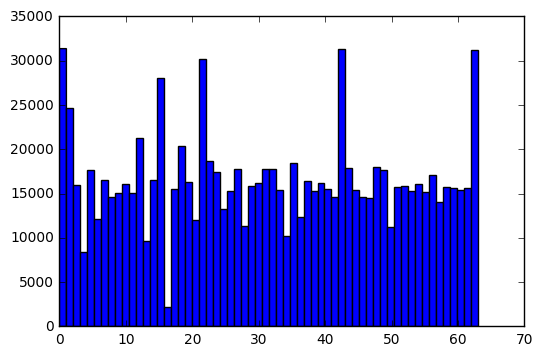

In [86]:
f_bins = group(dataset, 'Venta_hoy', 64, categorical, False)[1]
plt.hist(f_bins.values, 60)
plt.show()

39


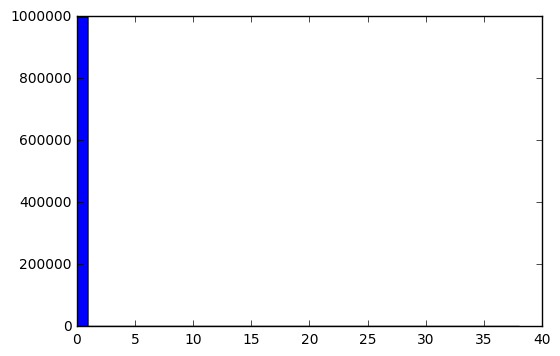

In [89]:
fw_bins = w_group(dataset, 'Venta_hoy', categorical, 'doane', False)[1]
plt.hist(fw_bins.values, 40)
plt.show()

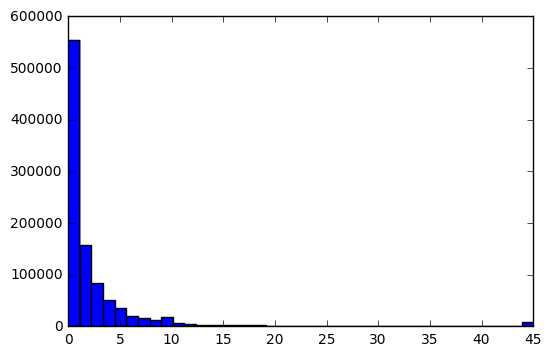

In [90]:
fa_bins = alt_group(dataset, 'Venta_hoy', categorical, 30, False)[1]
plt.hist(np.nan_to_num(fa_bins.values), 40, color='b')
plt.show()